<center>
<img src="./files/logo.png" height="900"> 
</center>


#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [2]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

norm_rv = sts.norm(loc=4, scale=10)

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p1 = 1 - norm_rv.cdf(4) 
p2 = norm_rv.cdf(20) - norm_rv.cdf(2) 
p3 = norm_rv.cdf(-5)

In [4]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

a = norm_rv.ppf(0.7)

In [6]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

b = norm_rv.ppf(0.75) - 4

In [8]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

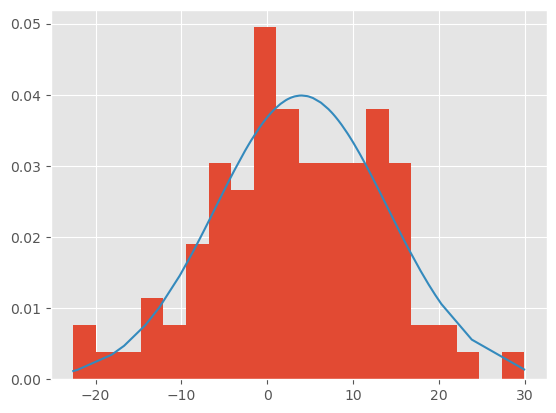

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
x = norm_rv.rvs(100)
plt.hist(x, density=True, bins=20)
y = [norm_rv.pdf(i) for i in sorted(x)]
plt.plot(sorted(x), y);

# ### BEGIN SOLUTION
# x = norm_rv.rvs(100)
# plt.hist(x, density=True, bins=20)
# xs = np.linspace(-20, 30, 300)
# ys = norm_rv.pdf(xs)
# plt.plot(xs, ys);
# ### END SOLUTION

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

NameError: name 'xs' is not defined

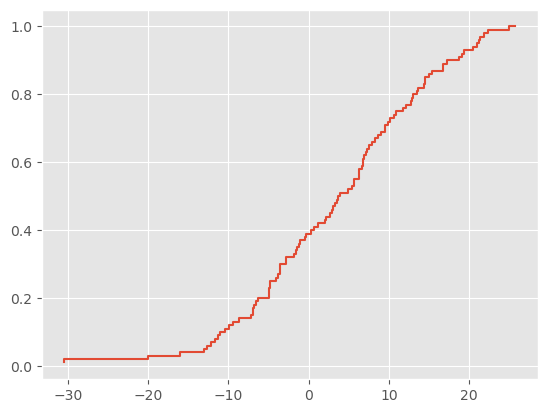

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

from statsmodels.distributions.empirical_distribution import ECDF
x = norm_rv.rvs(100)
ecdf = ECDF(x)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
ys = norm_rv.cdf(xs)
plt.plot(xs, ys);

## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = ...

### BEGIN SOLUTION
# 1 - P(X <= 4) = 1 - F(4)
p = 1 - sts.poisson(3).cdf(4)
### END SOLUTION

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
distr = sts.poisson(3)
p = 1 - distr.cdf(4)

In [13]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = sts.binom(14, 0.5).pmf(12)

In [15]:
assert np.abs(p - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = sts.binom(14, 0.9).pmf(12)

In [17]:
assert np.abs(p - 0.2570108) < 1e-5